In [72]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report
# from sklearn import metrics
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Data understanding and Cleaning 

In [73]:
dataset = pd.read_csv('diabetes.csv')
print(dataset.shape)
dataset.head(10)

(768, 10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sugar
0,6,148,72,35,0,33.6,0.627,50,1,1.020
1,1,85,66,29,0,26.6,0.351,31,0,1.020
2,8,183,64,0,0,23.3,0.672,32,1,1.010
3,1,89,66,23,94,28.1,0.167,21,0,1.005
4,0,137,40,35,168,43.1,2.288,33,1,1.010
5,5,116,74,0,0,25.6,0.201,30,0,1.015
6,3,78,50,32,88,31.0,0.248,26,1,1.010
7,10,115,0,0,0,35.3,0.134,29,0,1.015
8,2,197,70,45,543,30.5,0.158,53,1,1.015
9,8,125,96,0,0,0.0,0.232,54,1,1.020


In [74]:
dataset.columns # it display all the columns of the dataframe

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Sugar'],
      dtype='object')

In [75]:
# renaming to make it more user friendly

dataset.rename(columns = {'DiabetesPedigreeFunction':'Diabetes Pedigree Function'}, inplace = True)

In [76]:
#checking the null values in column
dataset.isnull().sum()

Pregnancies                     0
Glucose                         0
BloodPressure                   0
SkinThickness                   0
Insulin                         0
BMI                             0
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
Sugar                         351
dtype: int64

In [77]:
# dropping unwanted null value
dataset.drop({'Sugar'}, axis = 1, inplace = True)

In [78]:
dataset.describe() # it gives the basic statistics operation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualisation

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

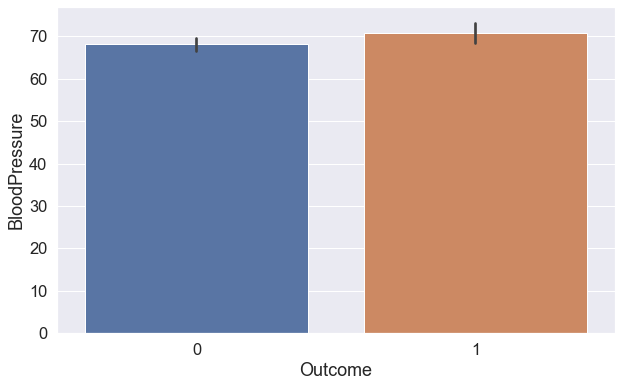

In [79]:
import seaborn as sb

fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'Outcome', y = 'BloodPressure', data = dataset)



<AxesSubplot:>

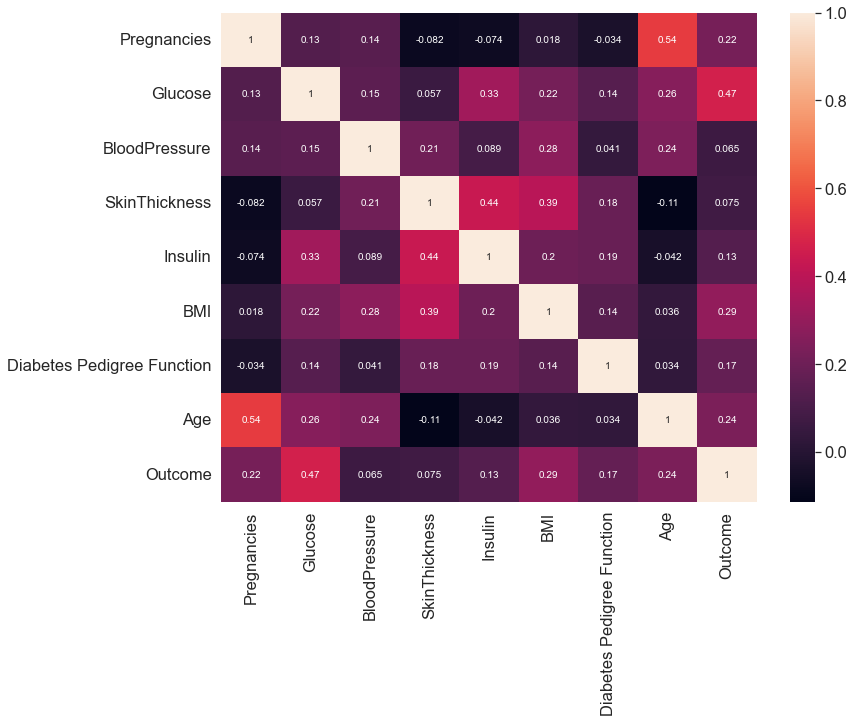

In [80]:
cor = dataset.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(cor, annot = True)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

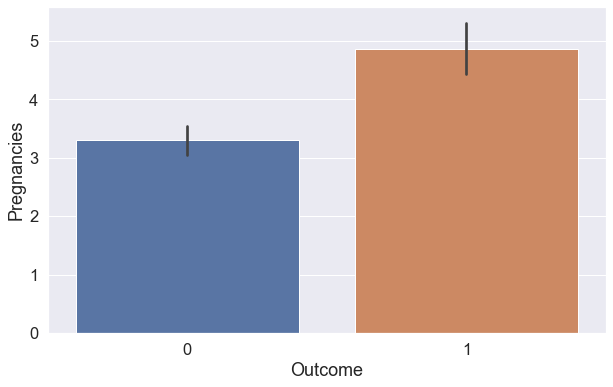

In [81]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Outcome', y = 'Pregnancies', data = dataset)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

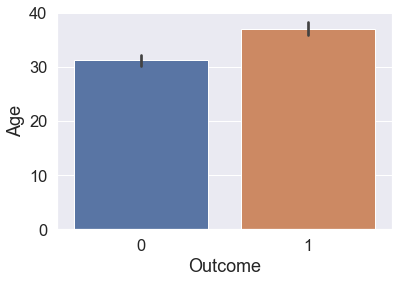

In [89]:
 
# who v/s fare barplot
sns.barplot(x = 'Outcome',
            y = 'Age',
            data = dataset)

# Splitting 

In [82]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age
426,0,94,0,0,0,0.0,0.256,25
9,8,125,96,0,0,0.0,0.232,54
249,1,111,86,19,0,30.1,0.143,23
22,7,196,90,0,0,39.8,0.451,41
221,2,158,90,0,0,31.6,0.805,66


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


In [85]:
y_train.head()

334    0
139    0
485    1
547    0
18     0
Name: Outcome, dtype: int64

In [86]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [87]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

#  Logistic Regression

In [90]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [91]:
y_pred_lr = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

model_score = model.score(X_train,y_train)
print(model_score)

model_score = model.score(X_test,y_test)
print(model_score)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

0.7821229050279329
0.7402597402597403


# Random Forest Classifier

In [92]:
print(len(X_train.columns))
print(round(len(X_train.columns)**0.5,1))

8
2.8


In [93]:
rfcl = RandomForestClassifier(n_estimators=50, random_state=42, max_features=4)
rfcl = rfcl.fit(X_train, y_train)

y_pred_rf = rfcl.predict(X_test)

print(rfcl.score(X_test,y_test))

0.7402597402597403


In [94]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



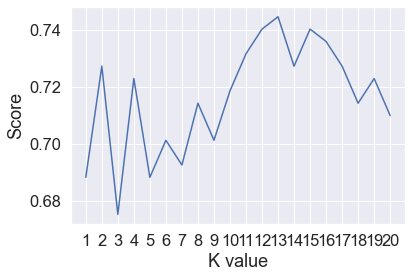

KNN best accuracy: 74.46%


In [95]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

# Grid Search CV

In [96]:
#Finding best parameters for our Logistic classifier model
from sklearn.model_selection import GridSearchCV, StratifiedKFold,StratifiedShuffleSplit
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10,random_state=42, test_size = 0.25, train_size=None)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')

## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [97]:
# Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.7682291666666667
{'C': 14, 'penalty': 'l2'}
LogisticRegression(C=14)


In [98]:
# Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.78515625

# Random forest cross validation 

In [99]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfcl_eval = cross_val_score(estimator = rfcl, X = X_train, y = y_train, cv = 10)
rfcl_eval.mean()

0.7802236198462614

# Grid Search CV

In [100]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [101]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 155}
0.7761904761904762
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=155)


In [102]:
# rebuilding the model of random forest
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.9713541666666666

# Feature Selection

In [103]:
# Necessary Imports
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.10590517, 0.22717843, 0.10299332, 0.07904195, 0.07257376,
       0.14620129, 0.12277487, 0.14333122])

In [105]:
feature_dict = dict(zip(dataset.columns, list(clf.feature_importances_)))
feature_dict

{'Pregnancies': 0.10590517364067198,
 'Glucose': 0.22717842672742153,
 'BloodPressure': 0.10299331559078026,
 'SkinThickness': 0.07904195159295402,
 'Insulin': 0.07257375537662634,
 'BMI': 0.14620128661515133,
 'Diabetes Pedigree Function': 0.12277486940291879,
 'Age': 0.14333122105347584}

In [106]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
features_new = model.transform(X)

In [107]:
features_new

array([[148. ,  33.6,  50. ],
       [ 85. ,  26.6,  31. ],
       [183. ,  23.3,  32. ],
       ...,
       [121. ,  26.2,  30. ],
       [126. ,  30.1,  47. ],
       [ 93. ,  30.4,  23. ]])

In [108]:
features_new.shape

(768, 3)

# Rebuilding Model

In [109]:
# Random Forest Classifier
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [110]:
# Logistic Regressor
logreg = LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None,solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)